In [2]:
!pip install --upgrade -r requirements.txt

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.3/10.6 MB 3.5 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/10.6 MB 6.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.6 MB 9.3 MB/s eta 0:00:01
   --------- ------------------------------ 2.7/10.6 MB 11.3 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/10.6 MB 13.8 MB/s eta 0:00:01
   ----------------- ---------------------- 4.8/10.6 MB 14.5 MB/s eta 0:00:01
   ---------------------- ----------------- 5.9/10.6 MB 16.3 MB/s eta 0:00:01
   --------------------------- ------------ 7.2/10.6 MB 17.8 MB/s eta 0:00:01
   --------------------------------- ------ 8.8/10.6 MB 19.5 MB/s eta 0:00:01
   -------------------------------------- - 10.4/10.6 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 23.4 MB/s eta 0:00

  You can safely remove it manually.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn_extra.cluster import KMedoids

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

In [4]:
df = pd.read_csv('Dados-Tarefa-02.csv', index_col = 'Index', names = ['Index','x','y'], header = 0)
df

,x,y
Index,,
0,1.225160,-0.951731
1,1.016304,-1.725175
2,0.335340,-1.724896
3,1.786348,-1.782653
4,1.016751,1.062569
...,...,...
995,0.929594,-0.743331
996,-0.338431,-0.343315
997,1.542708,-0.055665


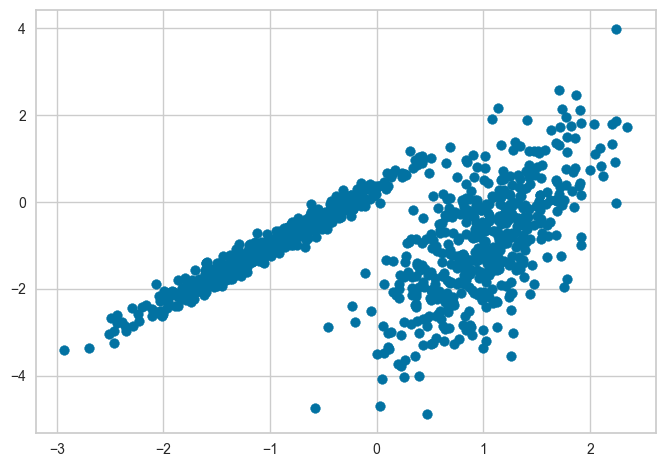

In [5]:
plt.scatter(df['x'],df['y'])

KMEANS

c:\Users\João Bornelli\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\João Bornelli\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


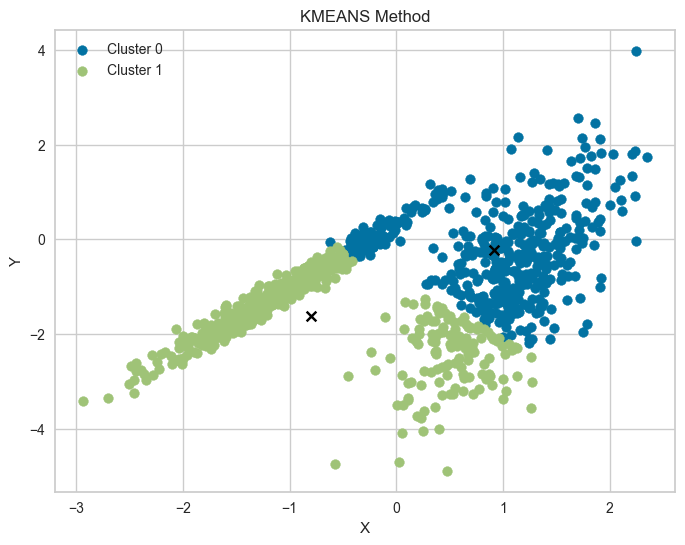

In [6]:
data = df.copy()
k = 2

kmeans = KMeans(n_clusters=k,random_state=0,n_init='auto')
kmeans.fit(data)
data['cluster'] = kmeans.predict(data)

plt.figure(figsize=(8, 6))

for i in np.unique(kmeans.labels_):
    row = data.index[kmeans.labels_ == i].tolist()
    scatter = plt.scatter(data.iloc[row,0],data.iloc[row,1],label = f'Cluster {i}')
    color = scatter.get_facecolors()[0].tolist()
    plt.scatter(kmeans.cluster_centers_[i][0],
                kmeans.cluster_centers_[i][1],
                color='black', marker='x')
    
plt.title('KMEANS Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

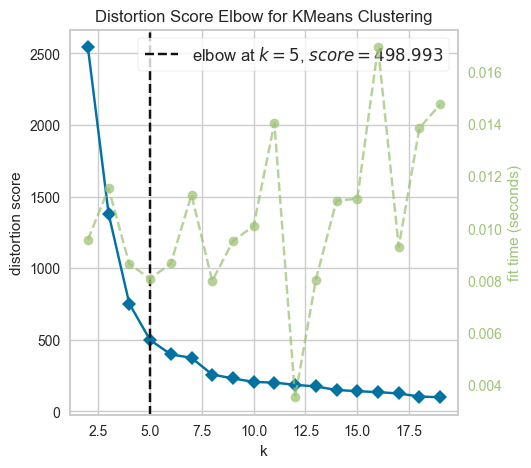

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
fig = plt.figure(figsize=(5, 5))

model = KMeans(random_state=20)
vizualizer = KElbowVisualizer(model,k=(2,20))
vizualizer.fit(data)
vizualizer.show()

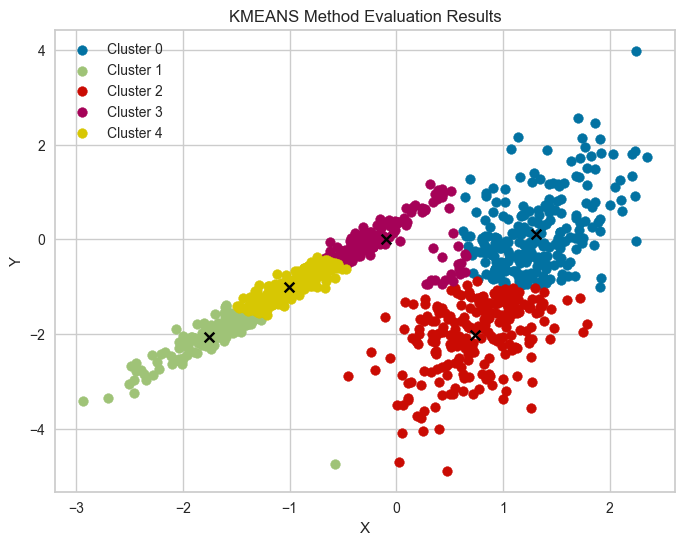

In [46]:
data = df.copy()
k = 5

kmeans = KMeans(n_clusters=k,random_state=0,n_init='auto')
kmeans.fit(data)
data['cluster'] = kmeans.predict(data)

plt.figure(figsize=(8, 6))

for i in np.unique(kmeans.labels_):
    row = data.index[kmeans.labels_ == i].tolist()
    scatter = plt.scatter(data.iloc[row,0],data.iloc[row,1],label = f'Cluster {i}')
    color = scatter.get_facecolors()[0].tolist()
    plt.scatter(kmeans.cluster_centers_[i][0],
                kmeans.cluster_centers_[i][1],
                color='black', marker='x')
        
plt.title('KMEANS Method Evaluation Results')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

KMedoid

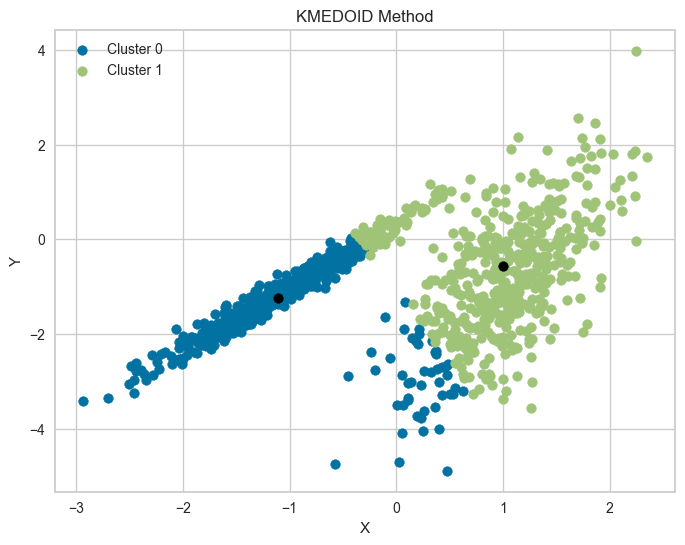

In [9]:
data = df.copy()
k = 2

kmedoid = KMedoids(n_clusters=k,random_state=0).fit(data)
data['cluster'] = kmedoid.predict(data)

plt.figure(figsize=(8, 6))

for i in np.unique(kmedoid.labels_):
    row = data.index[kmedoid.labels_ == i].tolist()
    scatter = plt.scatter(data.iloc[row,0],data.iloc[row,1],label = f'Cluster {i}')
    color = scatter.get_facecolors()[0].tolist()
    plt.scatter(kmedoid.cluster_centers_[i][0],
                kmedoid.cluster_centers_[i][1],
                color='black', marker='o')
    
plt.title('KMEDOID Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

DBSCAN

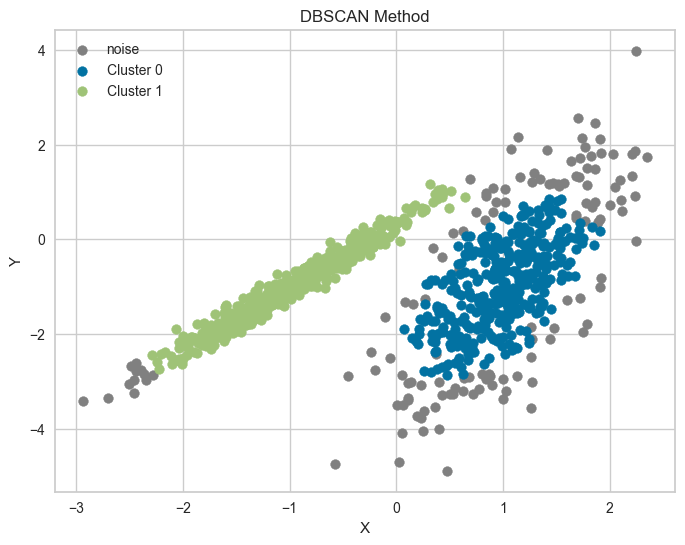

In [10]:
data = df.copy()
dbscan = DBSCAN(eps=0.2,min_samples=9).fit(data)
data['cluster'] = dbscan.fit_predict(data)

plt.figure(figsize=(8, 6))

for label in np.unique(dbscan.labels_):
    cluster_data = data[data['cluster'] == label]
    if label == -1:
        plt.scatter(cluster_data['x'],cluster_data['y'], color = 'gray', label = 'noise')
        # break
    else:
        plt.scatter(cluster_data['x'],cluster_data['y'], label = f'Cluster {label}')
        
plt.title('DBSCAN Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



BIRCH

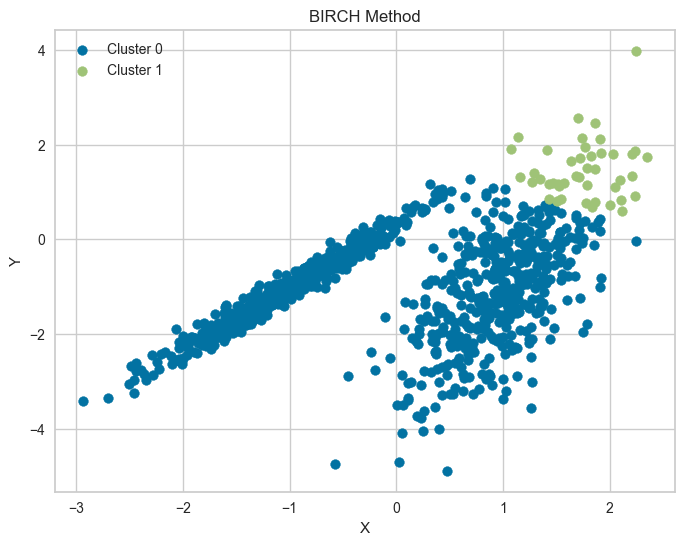

In [11]:
data = df

birch = Birch(n_clusters=2,threshold=0.5).fit(data)
data['cluster'] = birch.fit_predict(data)

plt.figure(figsize=(8, 6))

for label in np.unique(birch.labels_):
    cluster_data = data[data['cluster'] == label]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {label}')

plt.title('BIRCH Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()